In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 
import sklearn
np.set_printoptions(suppress=True)
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from sklearn.metrics import roc_curve

Attribute 1: (qualitative) 
Status of existing checking account 
A11 : ... < 0 DM 
A12 : 0 <= ... < 200 DM 
A13 : ... >= 200 DM / salary assignments for at least 1 year 
A14 : no checking account 

Attribute 2: (numerical) 
Duration in month 

Attribute 3: (qualitative) 
Credit history 
this feature was changed based on new sources 
• 0: Hesitant payment
• 1: Problematic running account
• 2: No previous credits left
• 3: No problem with the current credits at this bank
• 4: Paid back the previous credits at this bank
old sources:
A30 : no credits taken/ all credits paid back duly 
A31 : all credits at this bank paid back duly 
A32 : existing credits paid back duly till now 
A33 : delay in paying off in the past 
A34 : critical account/ other credits existing (not at this bank) 

Attribute 4: (qualitative) 
Purpose 
A40 : car (new) 
A41 : car (used) 
A42 : furniture/equipment 
A43 : radio/television 
A44 : domestic appliances 
A45 : repairs 
A46 : education 
A47 : (vacation - does not exist?) 
A48 : retraining 
A49 : business 
A410 : others 

Attribute 5: (numerical) 
Credit amount 

Attibute 6: (qualitative) 
Savings account/bonds 
A61 : ... < 100 DM 
A62 : 100 <= ... < 500 DM 
A63 : 500 <= ... < 1000 DM 
A64 : .. >= 1000 DM 
A65 : unknown/ no savings account 

Attribute 7: (qualitative) 
Present employment since 
A71 : unemployed 
A72 : ... < 1 year 
A73 : 1 <= ... < 4 years 
A74 : 4 <= ... < 7 years 
A75 : .. >= 7 years 

Attribute 8: (numerical) 
Installment rate in percentage of disposable income 

Attribute 9: (qualitative) 
Personal status and sex 
A91 : male : divorced/separated 
A92 : female : divorced/separated/married 
A93 : male : single 
A94 : male : married/widowed 
A95 : female : single 

Attribute 10: (qualitative) 
Other debtors / guarantors 
A101 : none 
A102 : co-applicant 
A103 : guarantor 

Attribute 11: (numerical) 
Present residence since 

Attribute 12: (qualitative) 
Property 
A121 : real estate 
A122 : if not A121 : building society savings agreement/ life insurance 
A123 : if not A121/A122 : car or other, not in attribute 6 
A124 : unknown / no property 

Attribute 13: (numerical) 
Age in years 

Attribute 14: (qualitative) 
Other installment plans 
A141 : bank 
A142 : stores 
A143 : none 

Attribute 15: (qualitative) 
Housing 
A151 : rent 
A152 : own 
A153 : for free 

Attribute 16: (numerical) 
Number of existing credits at this bank 

Attribute 17: (qualitative) 
Job 
A171 : unemployed/ unskilled - non-resident 
A172 : unskilled - resident 
A173 : skilled employee / official 
A174 : management/ self-employed/ 
highly qualified employee/ officer 

Attribute 18: (numerical) 
Number of people being liable to provide maintenance for 

Attribute 19: (qualitative) 
Telephone 
A191 : none 
A192 : yes, registered under the customers name 

Attribute 20: (qualitative) 
foreign worker 
A201 : yes 
A202 : no 

# Load Data & Data preprocessing

In [2]:
df = pd.read_csv('german.txt', sep=" ", header=None)
df.columns = ["Checking_account", "Duration", "Credit_history", "Purpose","Credit_amount","Savings","Employment","Installment_rate","Sex","Debtors_guarantors","Residence","Property","Age","Installmentplans","Housing","No_of_credits","Job","Nopeopleliable","Telephone","Foreign","Target"]
df.index += 1 
df.head()

,Checking_account,Duration,Credit_history,Purpose,Credit_amount,Savings,Employment,Installment_rate,Sex,Debtors_guarantors,...,Property,Age,Installmentplans,Housing,No_of_credits,Job,Nopeopleliable,Telephone,Foreign,Target
1,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
2,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
3,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
4,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
5,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [3]:
df.shape

(1000, 21)

In [4]:
df.dtypes.value_counts()

object    13
int64      8
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 1 to 1000
Data columns (total 21 columns):
Checking_account      1000 non-null object
Duration              1000 non-null int64
Credit_history        1000 non-null object
Purpose               1000 non-null object
Credit_amount         1000 non-null int64
Savings               1000 non-null object
Employment            1000 non-null object
Installment_rate      1000 non-null int64
Sex                   1000 non-null object
Debtors_guarantors    1000 non-null object
Residence             1000 non-null int64
Property              1000 non-null object
Age                   1000 non-null int64
Installmentplans      1000 non-null object
Housing               1000 non-null object
No_of_credits         1000 non-null int64
Job                   1000 non-null object
Nopeopleliable        1000 non-null int64
Telephone             1000 non-null object
Foreign               1000 non-null object
Target                1000 non-null int6

In [6]:
df.describe() #credit amount max outlier

,Duration,Credit_amount,Installment_rate,Residence,Age,No_of_credits,Nopeopleliable,Target
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


In [7]:
df.Target.value_counts().apply(lambda x: f'{x / len(df):.1%}')

1    70.0%
2    30.0%
Name: Target, dtype: object

In [8]:
df['Sex'] = df.Sex.map ({'A91' :0, 'A92' :1, 'A93' :0, 'A94' : 0, 'A95' :1})
df['Foreign'] = df.Foreign.map({'A201':1, 'A202' :0})
df['Telephone']=df.Telephone.map({'A191':0,'A192':1})
df['Target']=df.Target.map({1:0, 2:1})
df['Credit_history']=df.Credit_history.map({'A30':'problematic', 'A31':'problematic','A32':'no_credit','A33':'paid','A34':'paid'})
# df['Credit_history']=df.Credit_history.map({'A30':0, 'A31':0,'A32':1,'A33':2,'A34':3})
df['Checking_account']=df.Checking_account.map({'A11' :'negative','A12':'positive','A13':'positive','A14':'NA'})
df['Purpose']=df.Purpose.map({'A40':'newcar','A41':'oldcar','A42':'furniture','A43':'tvrad','A44':'others','A45':'others', 'A46':'others','A47':'others','A48':'others','A49':'business','A410':'others'})
df['Savings']=df.Savings.map({'A61':'low','A62':'low','A63':'high','A64':'high','A65':'NA'})
df['Employment']=df.Employment.map({'A71':0,'A72':1,'A73':2,'A74':3,'A75':4})
df['Debtors_guarantors']=df.Debtors_guarantors.map({'A101':0,'A102':1,'A103':1})  
df['Property']=df.Property.map({'A121':0,'A122':1,'A123':2,'A124':3})  
df['Installmentplans']=df.Installmentplans.map({'A141':1,'A142':1,'A143':0})
df['Housing']=df.Housing.map({'A151':'rent','A152':'own','A153':'free'})    
df['Job']=df.Job.map({'A171':0,'A172':1,'A173':2,'A174':3})

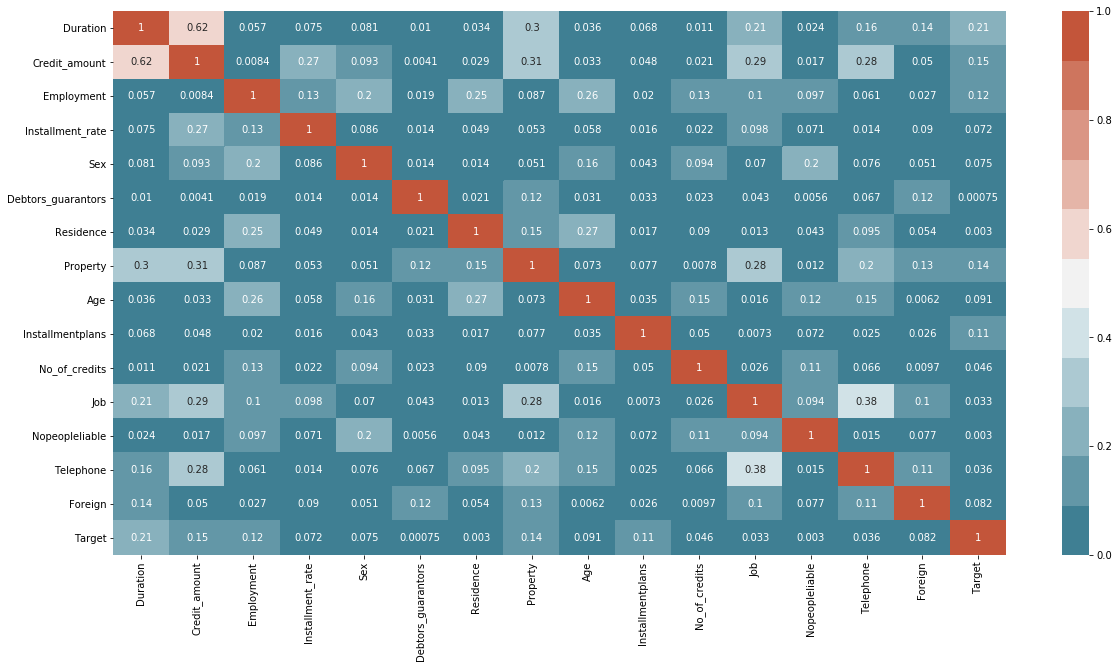

In [9]:
dfcor = df.corr().abs()
# dfcor[df < 0.1] = 0
plt.figure(figsize=(20, 10))

sns.heatmap(data=dfcor, annot=True,cmap=sns.diverging_palette(220, 20, n=11))

## Exploratory data analysis-features

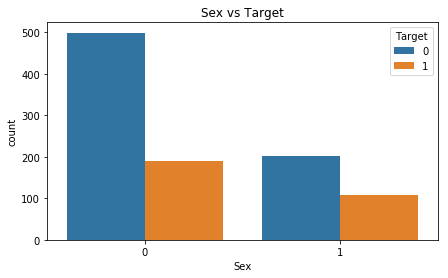

In [10]:
plt.figure(figsize=(7,4))
sns.countplot('Sex',hue='Target',data=df,).set_title('Sex vs Target')
plt.show()

In [11]:
df.Sex.value_counts()

0    690
1    310
Name: Sex, dtype: int64

In [12]:
df.groupby('Sex')['Target'].mean().reset_index().sort_values(by='Target')

,Sex,Target
0,0,0.276812
1,1,0.351613


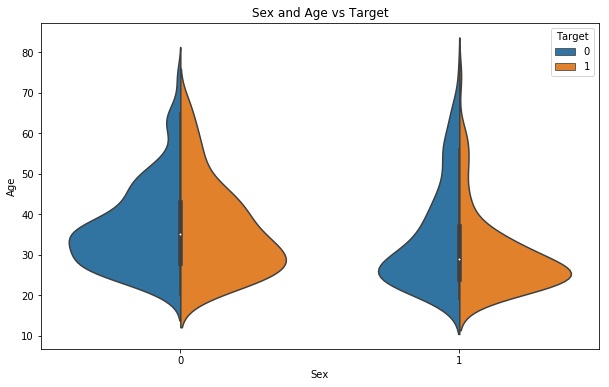

In [13]:
plt.figure(figsize=(10,6))

sns.violinplot("Sex","Age", hue="Target", data=df,split=True).set_title('Sex and Age vs Target')

plt.show()

In [15]:
def age_funcion(Age):
   
    if Age <= 20:
        return 0
    elif Age <= 30:
        return 1
    elif Age <= 40:
        return 2
    elif Age <= 50:
        return 3
    else:
        return 4

In [16]:
df['Age_group'] = df['Age'].apply(age_funcion)


In [17]:
df.groupby('Age_group')['Target'].mean().reset_index().sort_values(by='Target')

,Age_group,Target
2,2,0.253968
3,3,0.254658
4,4,0.274336
1,1,0.359494
0,0,0.375000


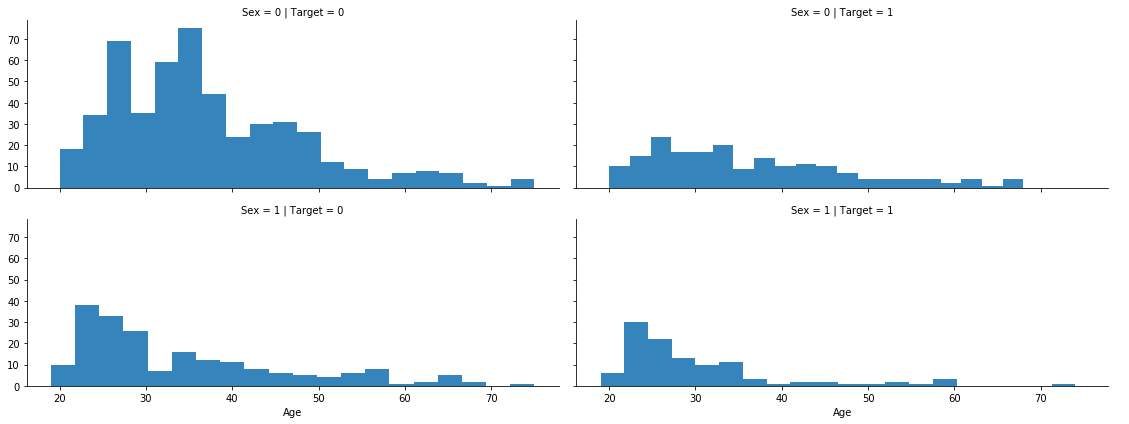

In [18]:
grid = sns.FacetGrid(data=df, col='Target', 
                     row='Sex', size=3, aspect=2.6)
grid.map(plt.hist, 'Age', alpha=.9, bins=20)
grid.add_legend();

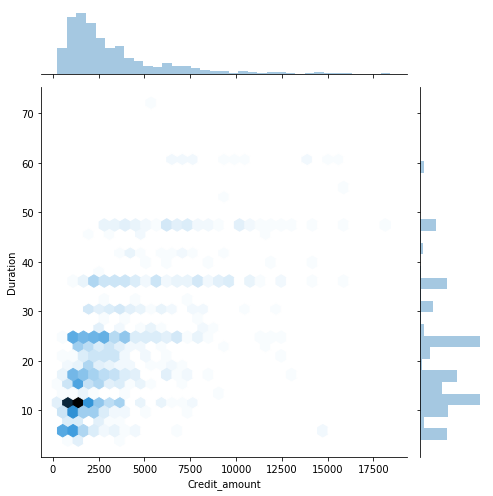

In [19]:
sns.jointplot(x='Credit_amount', y='Duration', data=df, kind='hex', size=7)
plt.show()

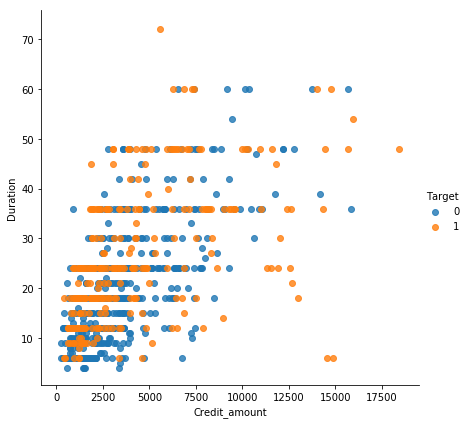

In [20]:
sns.lmplot(x='Credit_amount', y='Duration', hue='Target', data=df,fit_reg=False,height=6)
plt.show()

In [21]:
def duration_funcion(Duration):
   
    if Duration <= 10:
        return 0
    elif Duration <= 15:
        return 1
    elif Duration <= 20:
        return 2
    elif Duration <= 25:
        return 3
    else:
        return 4

In [22]:
df['Duration_group'] = df['Duration'].apply(duration_funcion)

In [23]:
df.groupby('Duration_group')['Target'].mean().reset_index().sort_values(by='Target')

,Duration_group,Target
0,0,0.157895
1,1,0.238462
3,3,0.300926
2,2,0.357724
4,4,0.443478


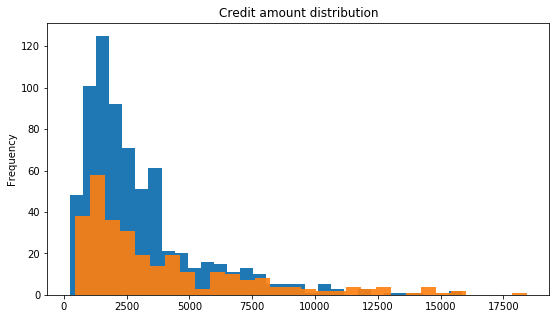

In [24]:
df.Credit_amount[df.Target == 0].plot(kind='hist', bins=30,figsize=(9,5))
df.Credit_amount[df.Target == 1].plot(kind='hist', bins=30, alpha=.9,figsize=(9,5))
plt.title('Credit amount distribution')
plt.show()

In [25]:
def creditamount_funcion(Credit_amount):
   
    if Credit_amount <= 2500:
        return 0
    elif Credit_amount <= 5000:
        return 1
    elif Credit_amount <= 7500:
        return 2
    elif Credit_amount <= 10000:
        return 3
    else:
        return 4

In [26]:
df['Credit_amount_group'] = df['Credit_amount'].apply(creditamount_funcion)

In [27]:
df.groupby('Credit_amount_group')['Target'].mean().reset_index().sort_values(by='Target')

,Credit_amount_group,Target
1,1,0.272727
0,0,0.273743
2,2,0.333333
3,3,0.434783
4,4,0.600000


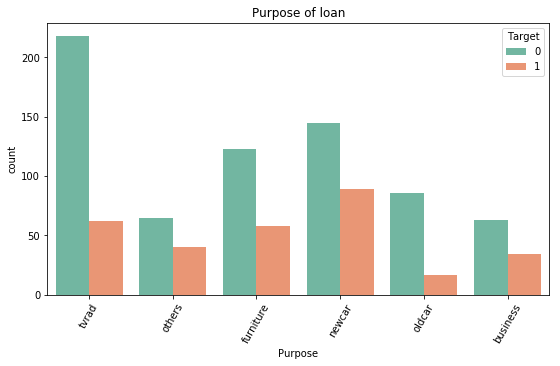

In [28]:
plt.figure(figsize=(9,5))
sns.countplot(x='Purpose', data=df, hue='Target',palette='Set2').set_title('Purpose of loan')
plt.xticks(rotation=60)
plt.show()

* in the dataset are 2x more males than females
* females had higher risk ratio of bad loans than males 
* females take loans most often when they are less than 30 /males between 20-40
* the higher credit amount,the higher probability of bad loan
* the longer duration, the higher probability of bad loan
* new car/business/education  and not specific loans have higher risk than the rest of loans
* oldcar has higher avg.credit_amount than newcar-outliers

In [30]:
summary_dict = {
                'Credit_amount': ['sum','count','mean'], 
                'Target': [ 'sum', 'mean']
                 }
df.groupby(['Purpose']).agg(summary_dict)

Credit_amount                    Target          
                    sum count         mean    sum      mean
Purpose                                                    
business         403330    97  4158.041237     34  0.350515
furniture        555125   181  3066.988950     58  0.320442
newcar           716748   234  3063.025641     89  0.380342
oldcar           553133   103  5370.223301     17  0.165049
others           346379   105  3298.847619     40  0.380952
tvrad            696543   280  2487.653571     62  0.221429

In [31]:
# Credit history feature mapping was changed based on new data source
# in the origin data file interpretation of feature was not logical(the worse credit history status, the less risk of a bad loan)

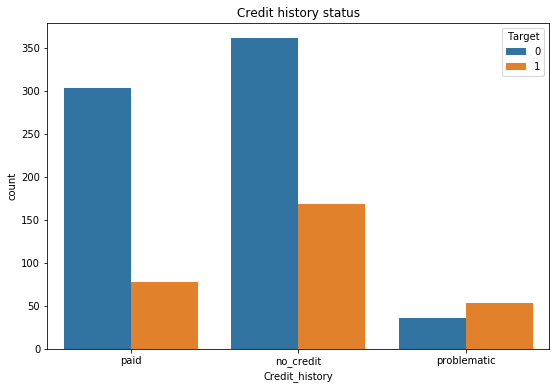

In [32]:
plt.figure(figsize=(9,6))
sns.countplot(x='Credit_history',hue='Target', data=df)
plt.title('Credit history status')
plt.show()


In [33]:
df.groupby('Credit_history')['Target'].mean().reset_index().sort_values(by='Target',ascending=False)

,Credit_history,Target
2,problematic,0.595506
0,no_credit,0.318868
1,paid,0.204724


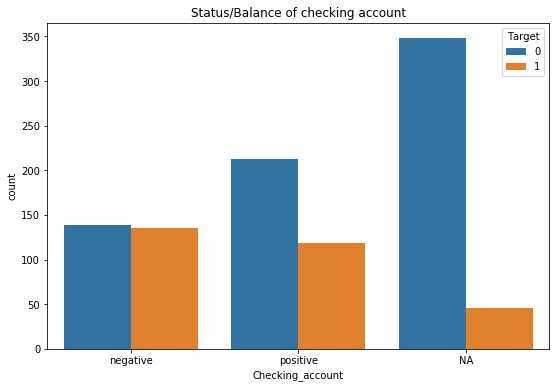

In [34]:
plt.figure(figsize=(9,6))
sns.countplot(x='Checking_account',hue='Target', data=df)
plt.title('Status/Balance of checking account')
plt.show()

In [35]:
df.groupby('Checking_account')['Target'].mean().reset_index().sort_values(by='Target', ascending=False)

,Checking_account,Target
1,negative,0.492701
2,positive,0.358434
0,NA,0.116751


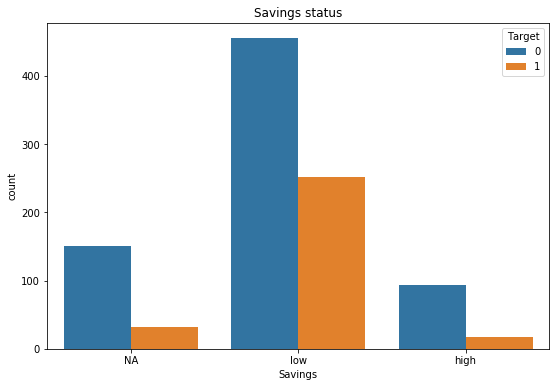

In [36]:
plt.figure(figsize=(9,6))
sns.countplot(x='Savings',hue='Target', data=df)
plt.title('Savings status')
plt.show()

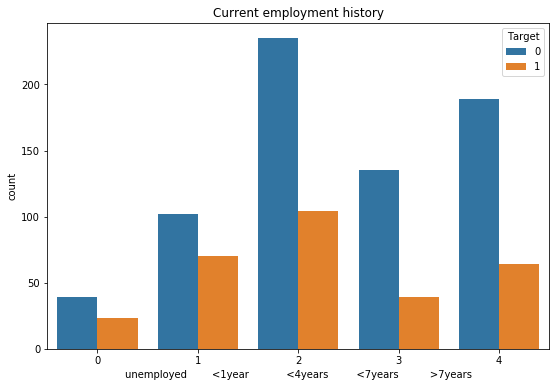

In [37]:
plt.figure(figsize=(9,6))
names=['unemployed', '<1year''<4years','<7years','>7years']
sns.countplot(x='Employment', hue='Target', data=df.sort_values(by='Employment'))
plt.title('Current employment history')
plt.xlabel('unemployed        <1year            <4years         <7years          >7years')
plt.show()

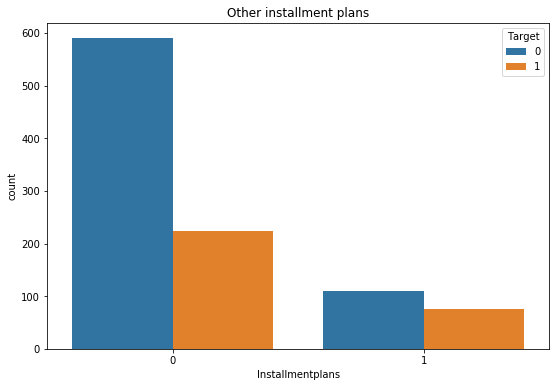

In [38]:
plt.figure(figsize=(9,6))
sns.countplot(x='Installmentplans',hue='Target', data=df)
plt.title('Other installment plans')
plt.show()

In [39]:
df.groupby('Foreign')['Target'].mean().reset_index().sort_values(by='Target',ascending=False)

,Foreign,Target
1,1,0.307373
0,0,0.108108


* clients without any checking account in a bank have lowest ratio of risk loan (so used one hot encoding)
* bad credit history means a higher risk of a bad loan
* clients with low savings have higher risk of a bad loan
* clients with short work experience have higher risk of a bad loan
* clients with other installment plans/foreigners have higher risk of a bad loan

In [40]:
# df['AVG_credit']=df['Credit_amount'] / df['Duration']
# df['Duration2']=df['Duration']**2
# df['Creditamount2']=df['Credit_amount']**2
# new features without significant impact on model resuts

In [41]:
# drop columns
drop_cols = ['Telephone']
df = df.drop(drop_cols, axis=1)


# Prepare machine learning models


In [42]:
X = df.drop(['Target','Age_group','Duration_group','Credit_amount_group'], axis=1)
Y = df['Target']

In [43]:
#one hot encoding is only applied to nominal category features(object types), for the rest of features (ordinals) applied Label Encoding

In [44]:
X=pd.get_dummies(X)   
# X=pd.get_dummies(X,drop_first=True)
X.head()

,Duration,Credit_amount,Employment,Installment_rate,Sex,Debtors_guarantors,Residence,Property,Age,Installmentplans,...,Purpose_newcar,Purpose_oldcar,Purpose_others,Purpose_tvrad,Savings_NA,Savings_high,Savings_low,Housing_free,Housing_own,Housing_rent
1,6,1169,4,4,0,0,4,0,67,0,...,0,0,0,1,1,0,0,0,1,0
2,48,5951,2,2,1,0,2,0,22,0,...,0,0,0,1,0,0,1,0,1,0
3,12,2096,3,2,0,0,3,0,49,0,...,0,0,1,0,0,0,1,0,1,0
4,42,7882,3,2,0,1,4,1,45,0,...,0,0,0,0,0,0,1,1,0,0
5,24,4870,2,3,0,0,4,3,53,0,...,1,0,0,0,0,0,1,1,0,0


In [45]:
# X.columns

In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=30,stratify=Y)

print('Train and test size:', len(X_train), len(X_test))
print('Class balance: ', sum(Y)/len(Y))

Train and test size: 700 300
Class balance:  0.3


In [47]:
sc_X=StandardScaler()
X_train_scaling =sc_X.fit_transform(X_train)
X_test_scaling = sc_X.transform(X_test)

In [48]:
X_scaling=sc_X.fit_transform(X)

## Logistic regression

In [49]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train_scaling, Y_train)
Y_pred = logreg.predict(X_test_scaling)
Y_prob = logreg.predict_proba(X_test_scaling)[:,1]

accuracy on train set:0.7671428571428571
accuracy on test set: 0.7766666666666666
AUC is: 0.8171957671957673
[[183  27]
 [ 40  50]]


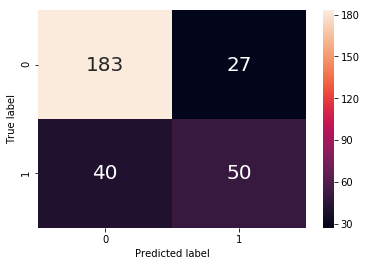

In [50]:
# Evaluate model
print(f'accuracy on train set:{logreg.score(X_train_scaling, Y_train)}')
print(f'accuracy on test set: {accuracy_score(Y_test, Y_pred)}')
auc_logreg = metrics.roc_auc_score(Y_test, Y_prob)  
print(f'AUC is: {auc_logreg}')
print(confusion_matrix(Y_test, Y_pred))

# print(classification_report(Y_test, Y_pred))
sns.heatmap(confusion_matrix(Y_test, Y_pred), fmt='g', annot=True, annot_kws={"size": 20})
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [51]:
# Run cross-validation
cv_results = cross_val_score(logreg, X_scaling, Y, cv=StratifiedKFold(n_splits=10), scoring='roc_auc')
print(f'Average roc_auc is {cv_results.mean():.2f} with standard deviation of {cv_results.std():.2f}')

Average roc_auc is 0.79 with standard deviation of 0.06


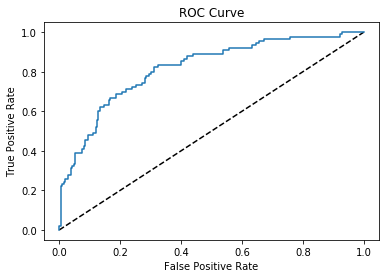

In [52]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(Y_test, Y_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [53]:
logreg030 = LogisticRegression(C=0.3,penalty='l1')
logreg030.fit(X_train_scaling, Y_train)
logreg030.coef_
# print("Training set accuracy: {:.3f}".format(logreg030.score(X_train_scaling, Y_train)))
# print("Test set accuracy: {:.3f}".format(logreg030.score(X_test_scaling, Y_test)))
logreg1 = LogisticRegression(C=1,penalty='l1')
logreg1.fit(X_train_scaling, Y_train)
logreg1.coef_
# print("Training set accuracy: {:.3f}".format(logreg1.score(X_train_scaling, Y_train)))
# print("Test set accuracy: {:.3f}".format(logreg1.score(X_test_scaling, Y_test)))
logreg003=LogisticRegression(C=0.03,penalty='l1')
logreg003.fit(X_train_scaling, Y_train)
logreg003.coef_
# print("Training set accuracy: {:.3f}".format(logreg003.score(X_train_scaling, Y_train)))
# print("Test set accuracy: {:.3f}".format(logreg003.score(X_test_scaling, Y_test)))

array([[ 0.11384701,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.01489314,
         0.        ,  0.        ,  0.        ,  0.        , -0.40615213,
         0.10741748,  0.        ,  0.        , -0.00661172,  0.09416935,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.06883349,  0.        ,
         0.        ,  0.        ]])

In [54]:
importances = pd.DataFrame({
    'feature': X.columns,
    'importance': logreg.coef_.flatten()  
})
importances

,feature,importance
0,Duration,0.273941
1,Credit_amount,0.254305
2,Employment,-0.198672
3,Installment_rate,0.250537
4,Sex,0.099816
5,Debtors_guarantors,-0.090421
6,Residence,0.027070
7,Property,0.137431
8,Age,-0.091974
9,Installmentplans,0.246917


In [55]:
# lower regularization push coefs towards 0 

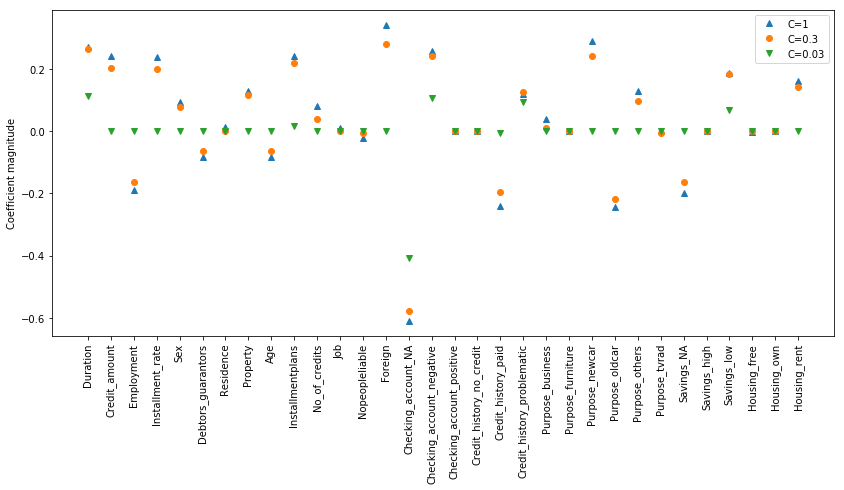

In [56]:
plt.figure(figsize=(14,6))

plt.plot(logreg1.coef_.T,'^',  label="C=1")
plt.plot(logreg030.coef_.T,'o',  label="C=0.3")
plt.plot(logreg003.coef_.T,'v',  label="C=0.03")#Stronger regularization 

plt.xticks(range(X.shape[1]), X.columns, rotation=90)
# plt.xticks(range(df.shape[1]), diabetes_features, rotation=90)
# plt.hlines(0, 0, diabetes.shape[1])
# plt.ylim(-5, 5)
# plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()
plt.savefig('log_coef')


## Tuning model Grid Search

In [57]:
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01,0.1,0.3,0.5,1,10,100], 'penalty': ['l1', 'l2']} #regularization parameterC-high overfit,penaltyL1lasso,L2ridge  0,4,10
logreg = LogisticRegression()

logreg_cv = GridSearchCV(logreg, param_grid, cv=5,scoring ='roc_auc')  

logreg_cv.fit(X_train_scaling, Y_train) 
best_params = logreg_cv.best_params_

# Print the tuned parameters and score
print(f'Tuned Logistic Regression Parameters: {logreg_cv.best_params_}') 
print(f'Best score is {logreg_cv.best_score_}')


Tuned Logistic Regression Parameters: {'C': 0.01, 'penalty': 'l2'}
Best score is 0.7824586977648201


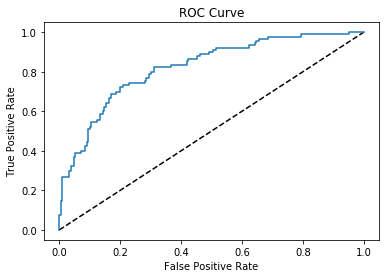

In [58]:
model_tuned = LogisticRegression(**best_params)
model_tuned = model_tuned.fit(X_train_scaling, Y_train)
Y_prob_tuned = model_tuned.predict_proba(X_test_scaling)[:,1]
Y_pred_tuned = model_tuned.predict(X_test_scaling)
fpr, tpr, thresholds = roc_curve(Y_test, Y_prob_tuned)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
# plot_roc_curve(Y_test, Y_prob_tuned, figsize=(6,6), curves=('each_class'))
# plt.show()

In [59]:
print(f'accuracy tuned is: {accuracy_score(Y_test, Y_pred_tuned)}')
auc_logreg_tuned = metrics.roc_auc_score(Y_test, Y_prob_tuned)  
print(f'AUC tuned is: {auc_logreg_tuned}')
print(confusion_matrix(Y_test, Y_pred_tuned))

accuracy tuned is: 0.78
AUC tuned is: 0.8222222222222222
[[180  30]
 [ 36  54]]


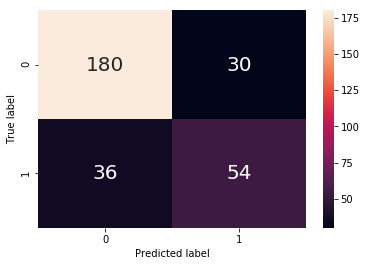

In [60]:
# print(classification_report(Y_test, Y_pred))
sns.heatmap(confusion_matrix(Y_test, Y_pred_tuned), fmt='g', annot=True, annot_kws={"size": 20})
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [61]:
cv_results_tuned = cross_val_score(model_tuned, X_scaling, Y, cv=StratifiedKFold(n_splits=10, ), scoring='roc_auc')  
cv_results_tuned

array([0.83571429, 0.72428571, 0.79285714, 0.7547619 , 0.82809524,
       0.85238095, 0.66857143, 0.82857143, 0.8347619 , 0.79666667])

In [62]:
print(f'Average roc_auc is {cv_results_tuned.mean():.2f} with standard deviation of {cv_results_tuned.std():.2f}')

Average roc_auc is 0.79 with standard deviation of 0.06


In [63]:
# print odds ratios
odds_ratios = pd.DataFrame({
    'feature': X.columns,
    'importance': np.exp(model_tuned.coef_.flatten())}   )
print(odds_ratios)

# positively/negative associated with target/likelihood that event will occur
#              pnew/(1-pnew)
# dds_ratio =  ------------  ak zvysim feature/prediktor o +1, kolkonasobne sa mi zvacsi/zmensi pravdepodobnosti zlej ku dobrej pozicke  oproti tejto sanci za predpokladu ze sa prediktor nezvysi
#              p/(1-p) 


                       feature  importance
0                     Duration    1.168871
1                Credit_amount    1.113196
2                   Employment    0.910505
3             Installment_rate    1.099616
4                          Sex    1.052559
5           Debtors_guarantors    0.964162
6                    Residence    1.003562
7                     Property    1.089995
8                          Age    0.940025
9             Installmentplans    1.134301
10               No_of_credits    1.019879
11                         Job    1.013919
12              Nopeopleliable    0.969382
13                     Foreign    1.126420
14         Checking_account_NA    0.770249
15   Checking_account_negative    1.246868
16   Checking_account_positive    1.061881
17    Credit_history_no_credit    1.032052
18         Credit_history_paid    0.898561
19  Credit_history_problematic    1.141309
20            Purpose_business    1.016353
21           Purpose_furniture    0.975506
22         

In [64]:
# random search

param_dist = {'C': [0.01,0.1,0.3,0.5],'penalty': ['l1', 'l2']}
random_search = RandomizedSearchCV(
    estimator=LogisticRegression(), 
    param_distributions=param_dist, 
    scoring="roc_auc"
)

random_search = random_search.fit(X_train_scaling, Y_train)
best_params = random_search.best_params_
print(best_params)
print(f'Best score is {random_search.best_score_}')

{'penalty': 'l2', 'C': 0.01}
Best score is 0.7655241551057053


In [65]:
model_tuned2 = LogisticRegression(**best_params)
model_tuned2 = model_tuned2.fit(X_train_scaling, Y_train)
Y_prob_tuned2 = model_tuned2.predict_proba(X_test_scaling)[:,1]
Y_pred_tuned2 = model_tuned2.predict(X_test_scaling)
print(f'accuracy tuned is: {accuracy_score(Y_test, Y_pred_tuned2)}')
auc_logreg_tuned2 = metrics.roc_auc_score(Y_test, Y_prob_tuned2)  
print(f'AUC tuned is: {auc_logreg_tuned2}')
print(confusion_matrix(Y_test, Y_pred_tuned2))

accuracy tuned is: 0.78
AUC tuned is: 0.8222222222222222
[[180  30]
 [ 36  54]]


# KNN

In [66]:
KNN = KNeighborsClassifier()

KNN = KNN.fit(X_train_scaling, Y_train)
Y_prob = KNN.predict_proba(X_test_scaling)[:,1]
Y_pred = KNN.predict(X_test_scaling)

In [67]:
# Evaluate model
print(f'accuracy on train set:{KNN.score(X_train_scaling, Y_train)}')
print(f'accuracy on test set: {accuracy_score(Y_test, Y_pred)}')
auc_KNN = metrics.roc_auc_score(Y_test, Y_prob)  
print(f'AUC is: {auc_KNN}')
print(confusion_matrix(Y_test, Y_pred))

accuracy on train set:0.8157142857142857
accuracy on test set: 0.7466666666666667
AUC is: 0.7215343915343915
[[183  27]
 [ 49  41]]


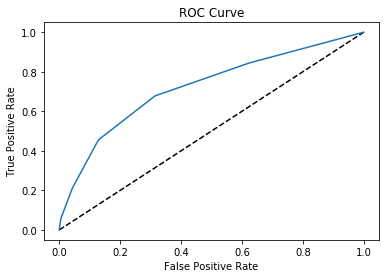

In [68]:
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

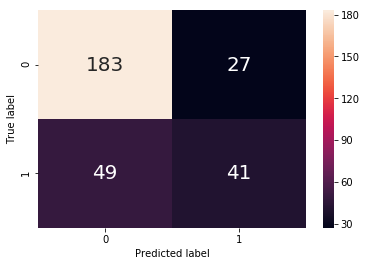

In [69]:
# print(classification_report(Y_test, Y_pred))
sns.heatmap(confusion_matrix(Y_test, Y_pred), fmt='g', annot=True, annot_kws={"size": 20})
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [70]:
# Run cross-validation
cv_results = cross_val_score(KNN, X_scaling, Y, cv=StratifiedKFold(n_splits=10), scoring='roc_auc')
print(f'Average roc_auc is {cv_results.mean():.2f} with standard deviation of {cv_results.std():.2f}')

Average roc_auc is 0.72 with standard deviation of 0.06


In [71]:
param_grid = {
              'n_neighbors': list(range(1,10)),
#     'weights': ('distance', 'uniform'),
#     'algorithm': ('ball_tree', 'kd_tree', 'brute'),
#     'leaf_size': [10, 20, 30, 40, 50],
#     'p': (1, 2)  
}
grid_search = GridSearchCV(
    KNeighborsClassifier(), 
    param_grid = param_grid, scoring='roc_auc',
    cv=5)  
grid_search = grid_search.fit(X_train_scaling, Y_train)
best_params = grid_search.best_params_


print(f'Tuned Decistion tree Parameters: {grid_search.best_params_}') 
print(f'Best score is {grid_search.best_score_}')

Tuned Decistion tree Parameters: {'n_neighbors': 5}
Best score is 0.730952380952381


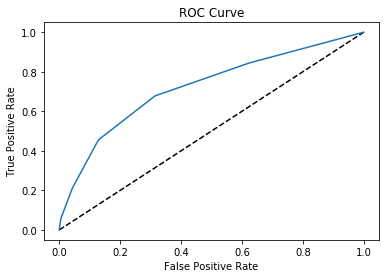

In [72]:
model_tuned = KNeighborsClassifier(**best_params)
model_tuned = model_tuned.fit(X_train_scaling, Y_train)
Y_prob_tuned = model_tuned.predict_proba(X_test_scaling)[:,1]
Y_pred_tuned = model_tuned.predict(X_test_scaling)
fpr, tpr, thresholds = roc_curve(Y_test, Y_prob_tuned)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [73]:
print(f'accuracy tuned is: {accuracy_score(Y_test, Y_pred_tuned)}')
auc_KNN_tuned = metrics.roc_auc_score(Y_test, Y_prob_tuned)  
print(f'AUC tuned is: {auc_KNN_tuned}')
print(confusion_matrix(Y_test, Y_pred_tuned))

accuracy tuned is: 0.7466666666666667
AUC tuned is: 0.7215343915343915
[[183  27]
 [ 49  41]]


# SVM

In [74]:
SVM = SVC()

SVM.fit(X_train_scaling, Y_train)
# Y_prob = SVM.predict_proba(X_test_scaling)[:,1]
Y_pred = SVM.predict(X_test_scaling)

In [75]:
# # Evaluate model
print(f'accuracy on train set:{SVM.score(X_train_scaling, Y_train)}')
print(f'accuracy on test set: {accuracy_score(Y_test, Y_pred)}')
# # auc_SVM = metrics.roc_auc_score(Y_test, Y_prob)  
# # print(f'AUC is: {auc_SVM}')
print(confusion_matrix(Y_test, Y_pred))

accuracy on train set:0.8628571428571429
accuracy on test set: 0.8
[[196  14]
 [ 46  44]]


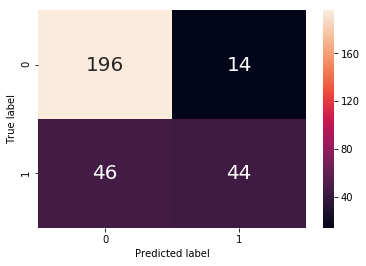

In [76]:
sns.heatmap(confusion_matrix(Y_test, Y_pred), fmt='g', annot=True, annot_kws={"size": 20})
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [77]:
# Run cross-validation
cv_results = cross_val_score(SVM, X_scaling, Y, cv=StratifiedKFold(n_splits=10), scoring='roc_auc')
print(f'Average roc_auc is {cv_results.mean():.2f} with standard deviation of {cv_results.std():.2f}')

Average roc_auc is 0.78 with standard deviation of 0.05


In [78]:
# param_grid = [
#   {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
#   {'C': [1, 10, 100, 1000],  'kernel': ['rbf']},
# #   {'C': [1, 10, 100, 1000], 'gamma': [0.1,0.01,0.001, 0.0001], 'kernel': ['rbf']},
      
# ]
# grid_search = GridSearchCV(
#     SVC(), 
#     param_grid = param_grid, scoring='roc_auc',
#     cv=5)  
# grid_search = grid_search.fit(X_train_scaling, Y_train)
# best_params = grid_search.best_params_


# print(f'Tuned Decistion tree Parameters: {grid_search.best_params_}') 
# print(f'Best score is {grid_search.best_score_}')

In [79]:
# model_tuned = SVC(C=1, kernel='rbf')
# model_tuned = model_tuned.fit(X_train_scaling, Y_train)
# # Y_prob_tuned = model_tuned.predict_proba(X_test_scaling)[:,1]
# Y_pred_tuned = model_tuned.predict(X_test_scaling)
# # fpr, tpr, thresholds = roc_curve(Y_test, Y_prob_tuned)

In [80]:
# print(f'accuracy tuned is: {accuracy_score(Y_test, Y_pred_tuned)}')
# # auc_logreg_tuned = metrics.roc_auc_score(Y_test, Y_prob_tuned)  
# # print(f'AUC tuned is: {auc_logreg_tuned}')
# print(confusion_matrix(Y_test, Y_pred_tuned))

# DecisionTreeClassifier

In [81]:
tree = DecisionTreeClassifier()

tree = tree.fit(X_train, Y_train)
Y_prob = tree.predict_proba(X_test)[:,1]
Y_pred = tree.predict(X_test)


In [82]:
# Evaluate model
print(f'accuracy on train set:{tree.score(X_train, Y_train)}')
print(f'accuracy on test set: {accuracy_score(Y_test, Y_pred)}')
auc_tree = metrics.roc_auc_score(Y_test, Y_prob)  
print(f'AUC is: {auc_tree}')
print(confusion_matrix(Y_test, Y_pred))

accuracy on train set:1.0
accuracy on test set: 0.7033333333333334
AUC is: 0.6547619047619048
[[163  47]
 [ 42  48]]


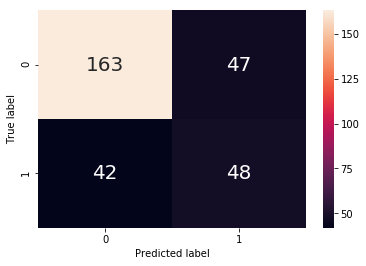

In [83]:
sns.heatmap(confusion_matrix(Y_test, Y_pred), fmt='g', annot=True, annot_kws={"size": 20})
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [84]:
# Run cross-validation
cv_results = cross_val_score(tree, X, Y, cv=StratifiedKFold(n_splits=10), scoring='roc_auc')
print(f'Average roc_auc is {cv_results.mean():.2f} with standard deviation of {cv_results.std():.2f}')

Average roc_auc is 0.64 with standard deviation of 0.04


## Tuning model Grid Search

In [85]:
param_grid = {
              'max_depth': [3,5,10,15],   
              'min_samples_split': [2,3,5,10],
              'min_samples_leaf': [1,2,3,5,10,15],
              'class_weight': [None, 'balanced'],
              'max_features':[5,12,15,20,25]  
              
             }

grid_search = GridSearchCV(
    DecisionTreeClassifier(), 
    param_grid = param_grid, scoring='roc_auc',
    cv=5,
    )


grid_search = grid_search.fit(X_train, Y_train)
best_params = grid_search.best_params_
Y_prod_grid = grid_search.predict_proba(X_test)[:,1]


print(f'Tuned Decistion tree Parameters: {grid_search.best_params_}') 
print(f'Best score is {grid_search.best_score_}')

Tuned Decistion tree Parameters: {'class_weight': 'balanced', 'max_depth': 5, 'max_features': 12, 'min_samples_leaf': 15, 'min_samples_split': 10}
Best score is 0.7436103012633625


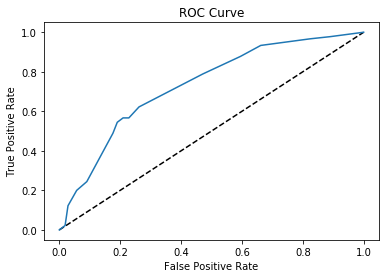

In [86]:
model_tuned = DecisionTreeClassifier(**best_params)
model_tuned = model_tuned.fit(X_train, Y_train)
Y_prob_tuned = model_tuned.predict_proba(X_test)[:,1]
Y_pred_tuned = model_tuned.predict(X_test)
fpr, tpr, thresholds = roc_curve(Y_test, Y_prob_tuned)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [87]:
print(f'accuracy tuned is: {accuracy_score(Y_test, Y_pred_tuned)}')
auc_tree_tuned = metrics.roc_auc_score(Y_test, Y_prob_tuned)  
print(f'AUC tuned is: {auc_tree_tuned}')
print(confusion_matrix(Y_test, Y_pred_tuned))

accuracy tuned is: 0.6066666666666667
AUC tuned is: 0.7312169312169311
[[111  99]
 [ 19  71]]


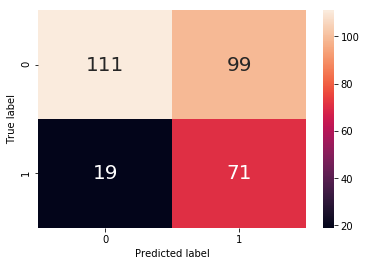

In [88]:
sns.heatmap(confusion_matrix(Y_test, Y_pred_tuned), fmt='g', annot=True, annot_kws={"size": 20})
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [89]:
cv_results_tuned = cross_val_score(model_tuned, X_train, Y_train, cv=StratifiedKFold(n_splits=10, ), scoring='roc_auc')
cv_results_tuned

array([0.74003887, 0.68172983, 0.65694849, 0.67346939, 0.78960155,
       0.67638484, 0.73226433, 0.63945578, 0.63799806, 0.78425656])

In [90]:
print(f'Average roc_auc is {cv_results_tuned.mean():.2f} with standard deviation of {cv_results_tuned.std():.2f}')

Average roc_auc is 0.70 with standard deviation of 0.05


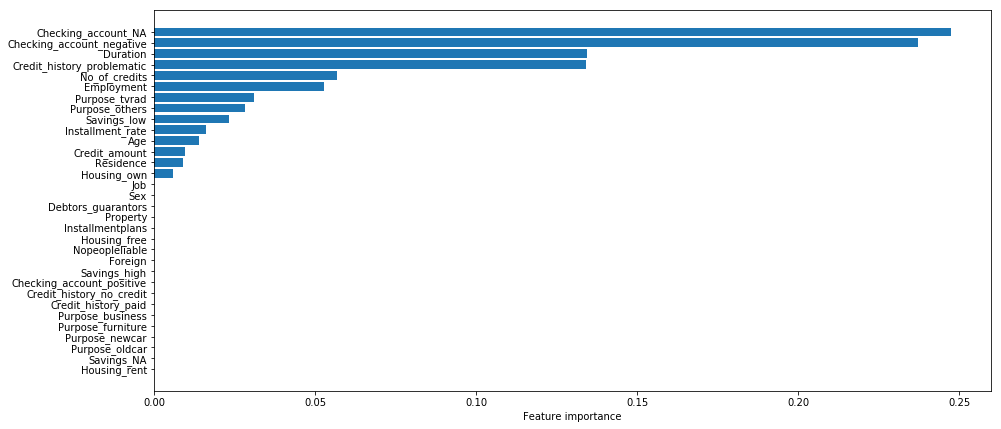

In [91]:
plt.figure(figsize=(15,7))

importances = pd.DataFrame({
    'feature': X.columns,
    'importance': model_tuned.feature_importances_
})
importances = importances.sort_values('importance')

plt.barh(importances.feature, importances.importance)
plt.xlabel('Feature importance')
plt.show()

# Ranom Forest Classifier

In [92]:
foreset = RandomForestClassifier()

forest = foreset.fit(X_train, Y_train)
Y_prob = forest.predict_proba(X_test)[:,1]
Y_pred = forest.predict(X_test)

In [93]:
# Evaluate model
print(f'accuracy on train set:{forest.score(X_train, Y_train)}')
print(f'accuracy on test set: {accuracy_score(Y_test, Y_pred)}')
auc_forest = metrics.roc_auc_score(Y_test, Y_prob)  
print(f'AUC is: {auc_forest}')
print(confusion_matrix(Y_test, Y_pred))

accuracy on train set:0.9857142857142858
accuracy on test set: 0.73
AUC is: 0.7353703703703703
[[187  23]
 [ 58  32]]


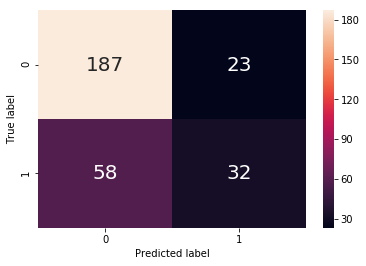

In [94]:
sns.heatmap(confusion_matrix(Y_test, Y_pred), fmt='g', annot=True, annot_kws={"size": 20})
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [95]:
forest = RandomForestClassifier(n_estimators=100)
cv_results = cross_val_score(forest, X, Y, cv=StratifiedKFold(n_splits=10, ), scoring='roc_auc')
cv_results

array([0.82142857, 0.71547619, 0.78142857, 0.78071429, 0.81452381,
       0.87666667, 0.71833333, 0.84690476, 0.8102381 , 0.78214286])

In [96]:
print(f'Average roc_auc is {cv_results.mean():.2f} with standard deviation of {cv_results.std():.2f}')

Average roc_auc is 0.79 with standard deviation of 0.05


## Tuning model Grid Search

In [97]:
param_grid = {'n_estimators':[50,100,200],
#               'max_depth': [2,5,10,15],
              'min_samples_split': [2,3,5,10],
              'min_samples_leaf': [1,2,3,5,10,15],
              "criterion": ["gini", "entropy"],
              'class_weight': [None, 'balanced']
             }
grid_search = GridSearchCV(
    RandomForestClassifier(), 
    param_grid = param_grid, scoring='roc_auc',
    cv=5)  

grid_search = grid_search.fit(X_train, Y_train)
best_params = grid_search.best_params_

print(f'Tuned Random Forest Parameters: {grid_search.best_params_}') 
print(f'Best score is {grid_search.best_score_}')

Tuned Random Forest Parameters: {'class_weight': None, 'criterion': 'gini', 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 50}
Best score is 0.7881438289601556


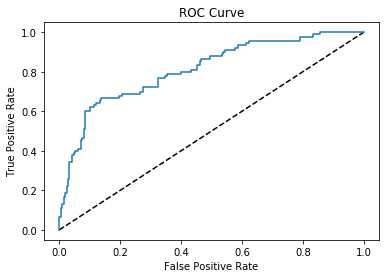

In [98]:
forest_tuned = RandomForestClassifier(**best_params)
forest_tuned = forest_tuned.fit(X_train, Y_train)
Y_prob_tuned = forest_tuned.predict_proba(X_test)[:,1]
Y_pred_tuned = forest_tuned.predict(X_test)
fpr, tpr, thresholds = roc_curve(Y_test, Y_prob_tuned)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [99]:
print(f'accuracy tuned is: {accuracy_score(Y_test, Y_pred_tuned)}')
auc_forest_tuned = metrics.roc_auc_score(Y_test, Y_prob_tuned)  
print(f'AUC tuned is: {auc_forest_tuned}')
print(confusion_matrix(Y_test, Y_pred_tuned))

accuracy tuned is: 0.79
AUC tuned is: 0.8107407407407407
[[193  17]
 [ 46  44]]


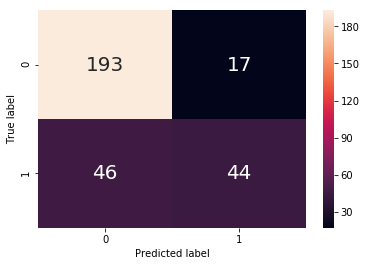

In [100]:
sns.heatmap(confusion_matrix(Y_test, Y_pred_tuned), fmt='g', annot=True, annot_kws={"size": 20})
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [101]:
cv_results_tuned = cross_val_score(forest_tuned, X, Y, cv=StratifiedKFold(n_splits=10, ), scoring='roc_auc')
cv_results_tuned

array([0.79619048, 0.72952381, 0.78190476, 0.79809524, 0.80666667,
       0.84904762, 0.71952381, 0.8247619 , 0.79809524, 0.76285714])

In [102]:
print(f'Average roc_auc is {cv_results_tuned.mean():.2f} with standard deviation of {cv_results_tuned.std():.2f}')

Average roc_auc is 0.79 with standard deviation of 0.04


## Feature importance

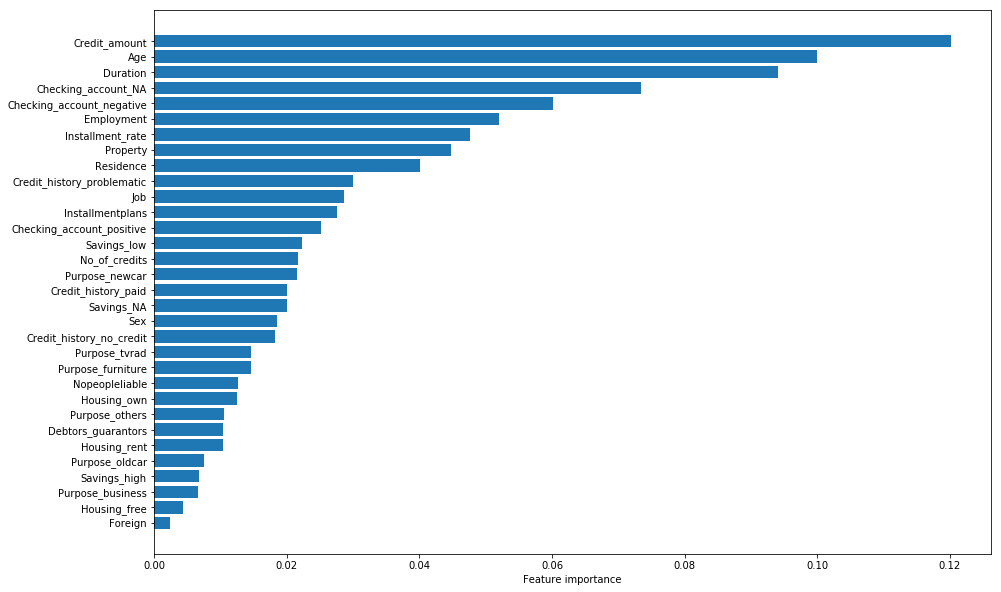

In [103]:
plt.figure(figsize=(15,10))

importances = pd.DataFrame({
    'feature': X.columns,
    'importance': forest_tuned.feature_importances_
})
importances = importances.sort_values('importance')

plt.barh(importances.feature, importances.importance)
plt.xlabel('Feature importance')
plt.show()

In [104]:
param_dist = {
    "criterion": ["gini", "entropy"],
    "max_depth": [3,5,10,12],
    "max_features": sp_randint(1, 11),
    "min_samples_split": sp_randint(2, 11),
    "min_samples_leaf": sp_randint(1,16),
    'n_estimators':[50,100,200],
}


random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(), 
    param_distributions=param_dist, 
#     n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1, 
    scoring="accuracy"
)

random_search = random_search.fit(X_train, Y_train)
best_params = random_search.best_params_

print(best_params)
print(f'Best score is {random_search.best_score_}')

{'criterion': 'gini', 'max_depth': 12, 'max_features': 7, 'min_samples_leaf': 4, 'min_samples_split': 9, 'n_estimators': 200}
Best score is 0.7257142857142858


In [105]:
model_tuned = RandomForestClassifier(**best_params)
model_tuned = model_tuned.fit(X_train, Y_train)
Y_prob_tuned = model_tuned.predict_proba(X_test)[:,1]
Y_pred_tuned = model_tuned.predict(X_test)
auc_forest_tuned2 = metrics.roc_auc_score(Y_test, Y_prob_tuned)  
print(f'AUC tuned is: {auc_forest_tuned2}')
print(confusion_matrix(Y_test, Y_pred_tuned2))

AUC tuned is: 0.8153439153439154
[[180  30]
 [ 36  54]]


# AdaBoostClassifier

In [106]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada = ada.fit(X_train, Y_train)
Y_prob = ada.predict_proba(X_test)[:,1]
Y_pred = ada.predict(X_test)


In [107]:
# Evaluate model
print(f'accuracy on train set:{ada.score(X_train, Y_train)}')
print(f'accuracy on test set: {accuracy_score(Y_test, Y_pred)}')
auc_ada = metrics.roc_auc_score(Y_test, Y_prob)  
print(f'AUC is: {auc_ada}')
print(confusion_matrix(Y_test, Y_pred))

accuracy on train set:0.7942857142857143
accuracy on test set: 0.75
AUC is: 0.790952380952381
[[173  37]
 [ 38  52]]


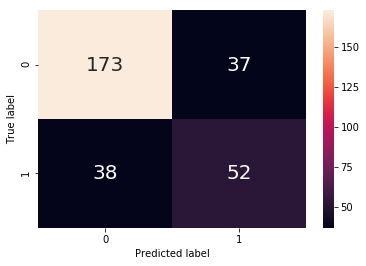

In [108]:
sns.heatmap(confusion_matrix(Y_test, Y_pred), fmt='g', annot=True, annot_kws={"size": 20})
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [109]:
ada = AdaBoostClassifier()
cv_results = cross_val_score(ada, X, Y, cv=StratifiedKFold(n_splits=10, ), scoring='roc_auc')
cv_results

array([0.81190476, 0.68      , 0.77952381, 0.71952381, 0.7652381 ,
       0.83714286, 0.67047619, 0.83952381, 0.80285714, 0.79047619])

In [110]:
print(f'Average roc_auc is {cv_results.mean():.2f} with standard deviation of {cv_results.std():.2f}')

Average roc_auc is 0.77 with standard deviation of 0.06


## Tuning model Grid Search

In [111]:
param_grid = {
              'n_estimators':[50,100,200],
              'learning_rate': [0.05,0.1,0.2,0.3,0.5,1]
              
             }

grid_search = GridSearchCV(
    AdaBoostClassifier(), 
    param_grid = param_grid, scoring='roc_auc',
    cv=5)  


grid_search = grid_search.fit(X_train, Y_train)
best_params = grid_search.best_params_


print(f'Tuned Ada Parameters: {grid_search.best_params_}') 
print(f'Best score is {grid_search.best_score_}')

Tuned Ada Parameters: {'learning_rate': 0.3, 'n_estimators': 50}
Best score is 0.7613459669582119


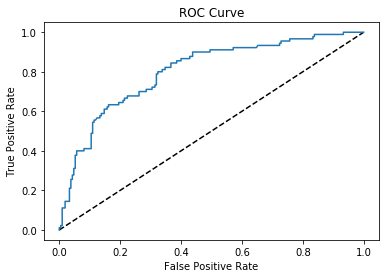

In [112]:
ada_tuned = AdaBoostClassifier(**best_params)
ada_tuned = ada_tuned.fit(X_train, Y_train)
Y_prob_tuned = ada_tuned.predict_proba(X_test)[:,1]
Y_pred_tuned = ada_tuned.predict(X_test)
fpr, tpr, thresholds = roc_curve(Y_test, Y_prob_tuned)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [113]:
print(f'accuracy tuned is: {accuracy_score(Y_test, Y_pred_tuned)}')
auc_ada_tuned = metrics.roc_auc_score(Y_test, Y_prob_tuned)  
print(f'AUC tuned is: {auc_ada_tuned}')
print(confusion_matrix(Y_test, Y_pred_tuned))

accuracy tuned is: 0.76
AUC tuned is: 0.8015343915343917
[[188  22]
 [ 50  40]]


In [114]:
cv_results_tuned = cross_val_score(ada_tuned, X, Y, cv=StratifiedKFold(n_splits=10, ), scoring='roc_auc')
cv_results_tuned

array([0.82571429, 0.75880952, 0.77714286, 0.77904762, 0.82095238,
       0.88952381, 0.64666667, 0.82952381, 0.82809524, 0.79047619])

In [115]:
print(f'Average roc_auc is {cv_results_tuned.mean():.2f} with standard deviation of {cv_results_tuned.std():.2f}')

Average roc_auc is 0.79 with standard deviation of 0.06


# GradientBoostingClassifier

In [116]:
from sklearn.ensemble import GradientBoostingClassifier

grad = GradientBoostingClassifier()

grad = grad.fit(X_train, Y_train)
Y_prob = grad.predict_proba(X_test)[:,1]
Y_pred = grad.predict(X_test)

In [117]:
# Evaluate model
print(f'accuracy on train set:{grad.score(X_train, Y_train)}')
print(f'accuracy on test set: {accuracy_score(Y_test, Y_pred)}')
auc_grad = metrics.roc_auc_score(Y_test, Y_prob)  
print(f'AUC is: {auc_grad}')
print(confusion_matrix(Y_test, Y_pred))

accuracy on train set:0.8985714285714286
accuracy on test set: 0.7966666666666666
AUC is: 0.8181481481481481
[[189  21]
 [ 40  50]]


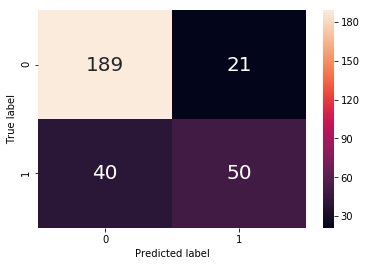

In [118]:
sns.heatmap(confusion_matrix(Y_test, Y_pred), fmt='g', annot=True, annot_kws={"size": 20})
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [119]:
grad = GradientBoostingClassifier()
cv_results = cross_val_score(grad, X, Y, cv=StratifiedKFold(n_splits=10, ), scoring='roc_auc')
cv_results

array([0.83428571, 0.7352381 , 0.77190476, 0.76      , 0.78333333,
       0.86380952, 0.72904762, 0.84047619, 0.7952381 , 0.78809524])

In [120]:
print(f'Average roc_auc is {cv_results.mean():.2f} with standard deviation of {cv_results.std():.2f}')

Average roc_auc is 0.79 with standard deviation of 0.04


## Tuning model Grid Search

In [121]:
param_grid = { 'n_estimators':[50,70,100],
              'learning_rate': [0.1,0.3],
              'min_samples_split': [2,3,5,10],
              'min_samples_leaf': [1,2,3,5,10,15]}
   
grid_search = GridSearchCV(
    GradientBoostingClassifier(), 
    param_grid = param_grid, scoring='roc_auc',
    cv=5)  

grid_search = grid_search.fit(X_train, Y_train)
best_params = grid_search.best_params_
print(f'Tuned Grandiant boosting tree Parameters: {grid_search.best_params_}') 
print(f'Best score is {grid_search.best_score_}')

Tuned Grandiant boosting tree Parameters: {'learning_rate': 0.1, 'min_samples_leaf': 10, 'min_samples_split': 2, 'n_estimators': 50}
Best score is 0.77089407191448


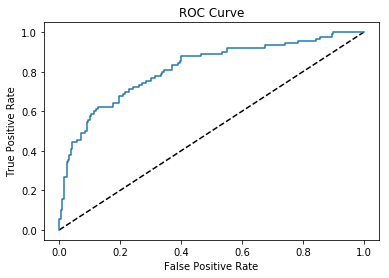

In [122]:
grad_tuned = GradientBoostingClassifier(**best_params)
grad_tuned = grad_tuned.fit(X_train, Y_train)
Y_prob_tuned = grad_tuned.predict_proba(X_test)[:,1]
Y_pred_tuned = grad_tuned.predict(X_test)
fpr, tpr, thresholds = roc_curve(Y_test, Y_prob_tuned)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [123]:
print(f'accuracy tuned is: {accuracy_score(Y_test, Y_pred_tuned)}')
auc_grad_tuned = metrics.roc_auc_score(Y_test, Y_prob_tuned)  
print(f'AUC tuned is: {auc_grad_tuned}')
print(confusion_matrix(Y_test, Y_pred_tuned))

accuracy tuned is: 0.8033333333333333
AUC tuned is: 0.8154497354497353
[[189  21]
 [ 38  52]]


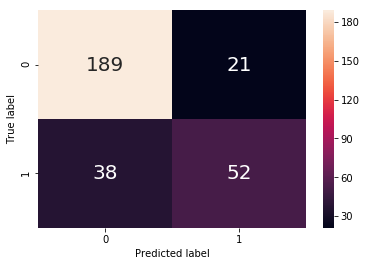

In [124]:
sns.heatmap(confusion_matrix(Y_test, Y_pred_tuned), fmt='g', annot=True, annot_kws={"size": 20})
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [125]:
cv_results_tuned = cross_val_score(grad_tuned, X, Y, cv=StratifiedKFold(n_splits=10, ), scoring='roc_auc')
cv_results_tuned

array([0.82380952, 0.7252381 , 0.77619048, 0.7647619 , 0.80285714,
       0.87809524, 0.71857143, 0.85666667, 0.79428571, 0.77904762])

In [126]:
print(f'Average roc_auc is {cv_results_tuned.mean():.2f} with standard deviation of {cv_results_tuned.std():.2f}')

Average roc_auc is 0.79 with standard deviation of 0.05


## Feature importance

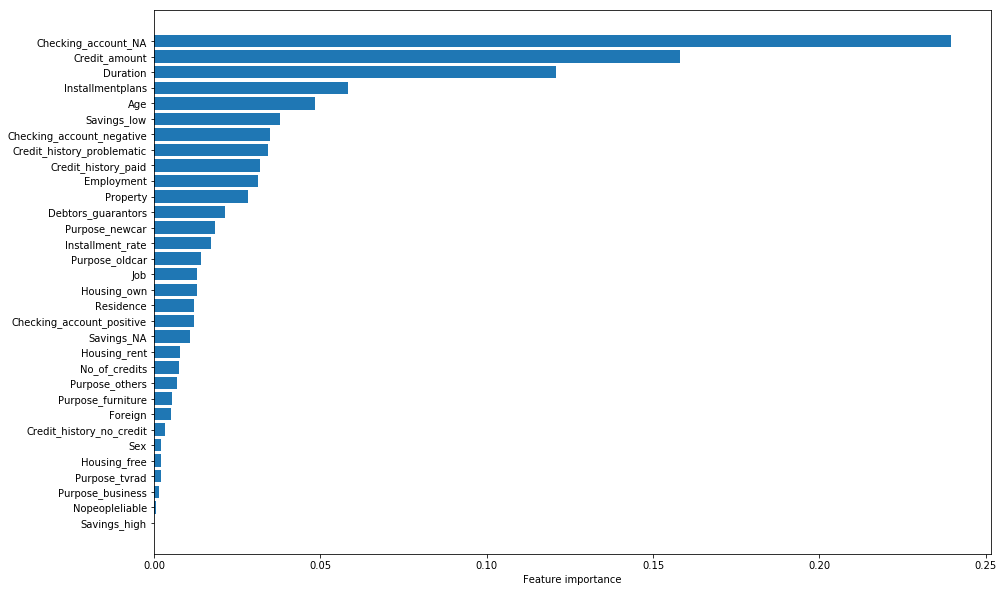

In [127]:
plt.figure(figsize=(15,10))

importances = pd.DataFrame({
    'feature': X.columns,
    'importance': grad_tuned.feature_importances_
})
importances = importances.sort_values('importance')

plt.barh(importances.feature, importances.importance)
plt.xlabel('Feature importance')
plt.show()

# Comparison of models before hyperparameter tuning

In [128]:
CV_mean=[]
CV_std=[]
classifiers=['LogisticRegression','KNN','SVC','Decision Tree','Random Forest','ADAboost', 'GrandientBoosting']
models=[LogisticRegression(),KNeighborsClassifier(),SVC()]
models2=[DecisionTreeClassifier(),RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier()]
# X_scaling =sc_X.fit_transform(X)


for i in models:
    model = i
    cv_result = cross_val_score(model,X_scaling, Y, cv=StratifiedKFold(n_splits=10, ), scoring='roc_auc')
    cv_result=cv_result
    CV_mean.append(cv_result.mean())
    CV_std.append(cv_result.std())
for i in models2:
    model2 = i
    cv_result2 = cross_val_score(model2,X, Y, cv=StratifiedKFold(n_splits=10, ), scoring='roc_auc')
    cv_result2=cv_result2
    CV_mean.append(cv_result2.mean())
    CV_std.append(cv_result2.std())
    
   
results_df=pd.DataFrame({'CV Mean':CV_mean,'Std':CV_std},index=classifiers)       
results_df
#

,CV Mean,Std
LogisticRegression,0.787810,0.058302
KNN,0.723071,0.064413
SVC,0.777286,0.050381
Decision Tree,0.644524,0.051969
Random Forest,0.742595,0.044202
ADAboost,0.769667,0.057673
GrandientBoosting,0.790905,0.042534


# Results before/after parameter tuning

In [129]:
print(f'logistic regression AUC:{auc_logreg:.2f}, tuned AUC:{auc_logreg_tuned:.2f}')
print(f'KNN AUC:{auc_KNN:.2f}, tuned AUC:{auc_KNN_tuned:.2f}')
# print(f'SVM AUC:{auc_SVM:.2f}')
print(f'decision tree AUC:{auc_tree:.2f}, tuned AUC:{auc_tree_tuned:.2f}') 
# print(f'random forest AUC:{auc_forest:.2f}, tuned AUC:{auc_forest_tuned:.2f}')  
print(f'random forest AUC:{auc_forest:.2f},tuned AUC:{auc_forest_tuned:.2f}')
print(f'ADAboost AUC:{auc_ada:.2f}')
print(f'GradientBoosting AUC:{auc_grad:.2f},tuned AUC:{auc_grad_tuned:.2f}')

logistic regression AUC:0.82, tuned AUC:0.82
KNN AUC:0.72, tuned AUC:0.72
decision tree AUC:0.65, tuned AUC:0.73
random forest AUC:0.74,tuned AUC:0.81
ADAboost AUC:0.79
GradientBoosting AUC:0.82,tuned AUC:0.82
